In [1]:
from IPython.display import Image
%matplotlib inline

# Contents

- [Data Preprocessing](# Data Preprocessing)
- [KNN](# KNN)
- [Decision Tree](# Decision Tree)
- [SVM](# SVM)
- [Logistic Regression](# Logistic Regression)

<a id='Data Preprocessing'></a>
# Data Preprocessing

 Providing two kinds of data preprocessing 
    1. bank_dummy: all categorical variables are transformed into dummy variables;
    2. bank_ordinal_dummy: the 'education' variable and 'month' variable are transformed into ordinal varibles, all the other categorical
        variables are transformed into dummy variables.

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
bank = pd.read_csv('bank.csv',sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_dummy = pd.get_dummies(bank,drop_first=True)

In [6]:
bank_dummy.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
education_mapping = {'unknown': -1,
                     'secondary': 1,
                     'primary': 2,
                     'tertiary': 3}
month_mapping = {'jan': 1,
                 'feb': 2,
                 'mar': 3,
                 'apr': 4,
                 'may': 5,
                 'jun': 6,
                 'jul': 7,
                 'aug': 8,
                 'sep': 9,
                 'oct': 10,
                 'nov': 11,
                 'dec': 12}

In [8]:
bank_ordinal = bank.copy()
bank_ordinal['education'] = bank_ordinal['education'].map(education_mapping)
bank_ordinal['month'] = bank_ordinal['month'].map(month_mapping)
bank_ordinal_dummy = pd.get_dummies(bank_ordinal,drop_first=True)
bank_ordinal_dummy.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,2,1787,19,10,79,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,11,5,220,1,339,4,0,...,0,0,1,1,0,0,0,0,0,0
2,35,3,1350,16,4,185,1,330,1,0,...,1,0,1,0,0,0,0,0,0,0
3,30,3,1476,3,6,199,4,-1,0,0,...,0,0,1,1,0,1,0,0,1,0
4,59,1,0,5,5,226,1,-1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

X1, y1 = bank_dummy.iloc[:, 0:-1].values, bank_dummy.iloc[:, -1].values

X1_train, X1_test, y1_train, y1_test =\
    train_test_split(X1, y1, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y1)
    
X2, y2 = bank_ordinal_dummy.iloc[:, 0:-1].values, bank_ordinal_dummy.iloc[:, -1].values

X2_train, X2_test, y2_train, y2_test =\
    train_test_split(X2, y2, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y2)

In [10]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X1_train_std = stdsc.fit_transform(X1_train)
X1_test_std = stdsc.transform(X1_test)

X2_train_std = stdsc.fit_transform(X2_train)
X2_test_std = stdsc.transform(X2_test)

C:\Users\phbs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X1_train_std[:,7:] = X1_train[:,7:]
X1_test_std[:,7:] = X1_test[:,7:]
X2_train_std[:,9:] = X2_train[:,9:]
X2_test_std[:,9:]= X2_test[:,9:]

<a id='KNN'></a>
# KNN

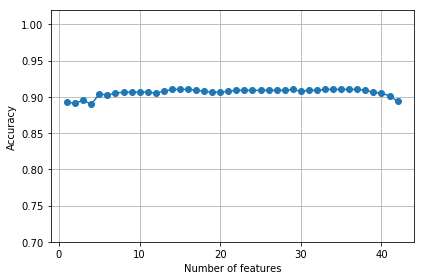

In [13]:
from SBS import SBS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features from dataset bank_dummy
sbs = SBS(knn, k_features=1)
sbs.fit(X1_train_std, y1_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [15]:
k12 = list(sbs.subsets_[-2])
k13 = list(sbs.subsets_[-3])
print(bank_dummy.columns[k12])
print(bank_dummy.columns[k13])

Index(['day', 'housing_yes'], dtype='object')
Index(['day', 'duration', 'housing_yes'], dtype='object')


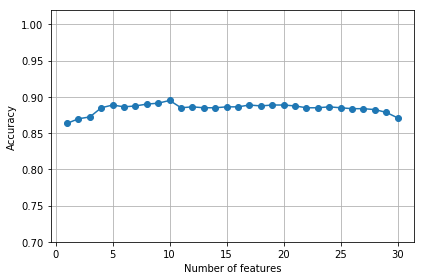

In [16]:
# selecting features from dataset bank_nominal_dummy
sbs.fit(X2_train_std, y2_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [17]:
k22 = list(sbs.subsets_[-2])
k23 = list(sbs.subsets_[-3])
print(bank_ordinal_dummy.columns[k22])
print(bank_ordinal_dummy.columns[k23])

Index(['age', 'duration'], dtype='object')
Index(['age', 'duration', 'previous'], dtype='object')


In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

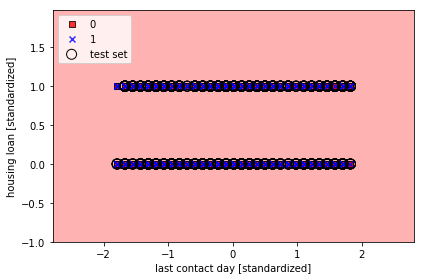

2-feature Training accuracy: 0.884639696587
2-feature Test accuracy: 0.885040530582
3-feature Training accuracy: 0.905815423515
3-feature Test accuracy: 0.873986735446


In [19]:
X1_combined_std = np.vstack((X1_train_std[:,k12], X1_test_std[:, k12]))
y1_combined = np.hstack((y1_train, y1_test))

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X1_train_std[:, k12], y1_train)

plot_decision_regions(X1_combined_std, y1_combined, 
                      classifier=knn, test_idx=range(len(X1_train_std[:, k12]), len(X1_train_std[:, k12])+len(X1_test_std[:, k12])))

plt.xlabel('last contact day [standardized]')
plt.ylabel('housing loan [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', knn.score(X1_train_std[:, k12], y1_train))
print('2-feature Test accuracy:', knn.score(X1_test_std[:, k12], y1_test))

knn.fit(X1_train_std[:, k13], y1_train)
print('3-feature Training accuracy:', knn.score(X1_train_std[:, k13], y1_train))
print('3-feature Test accuracy:', knn.score(X1_test_std[:, k13], y1_test))

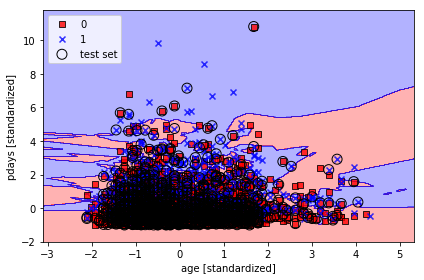

2-feature Training accuracy: 0.908343868521
2-feature Test accuracy: 0.868828297716
3-feature Training accuracy: 0.911188369153
3-feature Test accuracy: 0.871039056743


In [20]:
X2_combined_std = np.vstack((X2_train_std[:,k22], X2_test_std[:, k22]))
y2_combined = np.hstack((y2_train, y2_test))

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train_std[:, k22], y2_train)

plot_decision_regions(X2_combined_std, y2_combined, 
                      classifier=knn, test_idx=range(len(X2_train_std[:, k22]), len(X2_train_std[:, k22])+len(X2_test_std[:, k22])))

plt.xlabel('age [standardized]')
plt.ylabel('pdays [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', knn.score(X2_train_std[:, k22], y2_train))
print('2-feature Test accuracy:', knn.score(X2_test_std[:, k22], y2_test))

knn.fit(X2_train_std[:, k23], y2_train)
print('3-feature Training accuracy:', knn.score(X2_train_std[:, k23], y2_train))
print('3-feature Test accuracy:', knn.score(X2_test_std[:, k23], y2_test))

<a id='Decision Tree'></a>
# Decision Tree

In [21]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

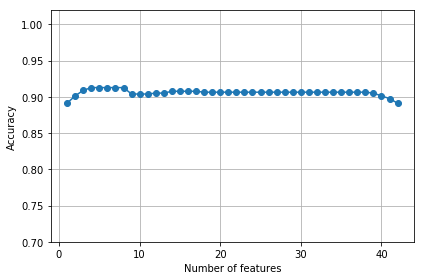

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)

# selecting features from dataset bank_dummy
sbs = SBS(tree, k_features=1)
sbs.fit(X1_train, y1_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [23]:
k12_tree = list(sbs.subsets_[-2])
k13_tree = list(sbs.subsets_[-3])
print(bank_dummy.columns[k12_tree])
print(bank_dummy.columns[k13_tree])

Index(['duration', 'previous'], dtype='object')
Index(['duration', 'previous', 'poutcome_success'], dtype='object')


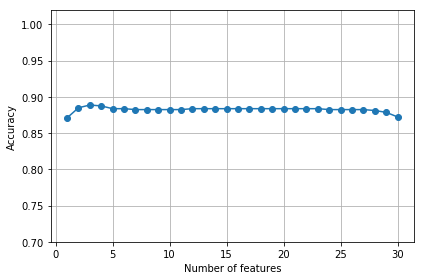

In [24]:
# selecting features from dataset bank_ordinal_dummy
sbs.fit(X2_train, y2_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [25]:
k22_tree = list(sbs.subsets_[-2])
k23_tree = list(sbs.subsets_[-3])
print(bank_ordinal_dummy.columns[k22_tree])
print(bank_ordinal_dummy.columns[k23_tree])

Index(['duration', 'marital_married'], dtype='object')
Index(['duration', 'marital_married', 'poutcome_success'], dtype='object')


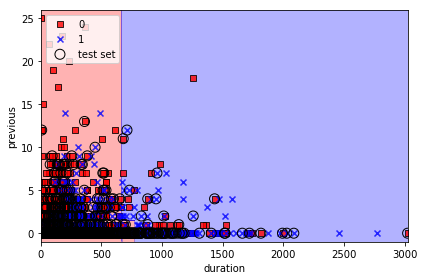

2-feature Training accuracy: 0.893805309735
2-feature Test accuracy: 0.887988209285
3-feature Training accuracy: 0.90391908976
3-feature Test accuracy: 0.899778924097


In [26]:
tree.fit(X1_train[:, k12_tree], y1_train)

X1_combined = np.vstack((X1_train[:, k12_tree], X1_test[:, k12_tree]))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(X1_combined, y1_combined, 
                      classifier=tree, 
                      test_idx=range(len(X1_train[:, k12_tree]), len(X1_train[:, k12_tree])+len(X1_test[:, k12_tree])))

plt.xlabel('duration')
plt.ylabel('previous')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', tree.score(X1_train[:, k12_tree], y1_train))
print('2-feature Test accuracy:', tree.score(X1_test[:, k12_tree], y1_test))

tree.fit(X1_train[:, k13_tree], y1_train)
print('3-feature Training accuracy:', tree.score(X1_train[:, k13_tree], y1_train))
print('3-feature Test accuracy:', tree.score(X1_test[:, k13_tree], y1_test))

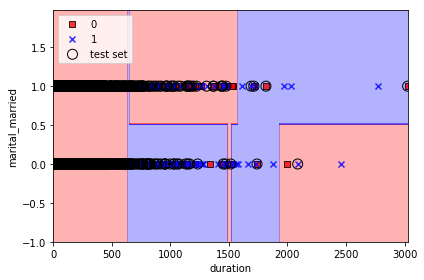

2-feature Training accuracy: 0.898546144121
2-feature Test accuracy: 0.879145173176
3-feature Training accuracy: 0.909292035398
3-feature Test accuracy: 0.889462048637


In [27]:
tree.fit(X2_train[:, k22_tree], y2_train)

X2_combined = np.vstack((X2_train[:, k22_tree], X2_test[:, k22_tree]))
y2_combined = np.hstack((y2_train, y2_test))
plot_decision_regions(X2_combined, y2_combined, 
                      classifier=tree, 
                      test_idx=range(len(X2_train[:, k22_tree]), len(X2_train[:, k22_tree])+len(X2_test[:, k22_tree])))

plt.xlabel('duration')
plt.ylabel('marital_married')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', tree.score(X2_train[:, k22_tree], y2_train))
print('2-feature Test accuracy:', tree.score(X2_test[:, k22_tree], y2_test))

tree.fit(X2_train[:, k23_tree], y2_train)
print('3-feature Training accuracy:', tree.score(X2_train[:, k23_tree], y2_train))
print('3-feature Test accuracy:', tree.score(X2_test[:, k23_tree], y2_test))

<a id='SVM'></a>
# SVM

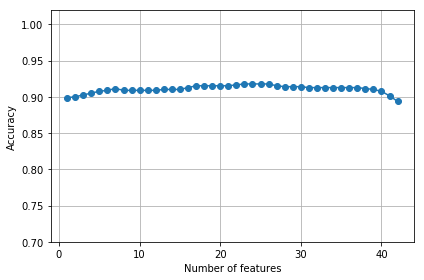

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)

# selecting features from dataset bank_dummy
sbs = SBS(svm, k_features=1)
sbs.fit(X1_train_std, y1_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [29]:
k12_svm = list(sbs.subsets_[-2])
k13_svm = list(sbs.subsets_[-3])
print(bank_dummy.columns[k12_svm])
print(bank_dummy.columns[k13_svm])

Index(['balance', 'duration'], dtype='object')
Index(['balance', 'duration', 'poutcome_success'], dtype='object')


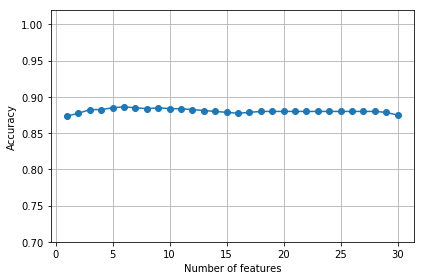

In [30]:
# selecting features from dataset bank_ordinal_dummy
sbs.fit(X2_train_std, y2_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [31]:
k22_svm = list(sbs.subsets_[-2])
k23_svm = list(sbs.subsets_[-3])
print(bank_ordinal_dummy.columns[k22_svm])
print(bank_ordinal_dummy.columns[k23_svm])

Index(['duration', 'poutcome_success'], dtype='object')
Index(['duration', 'marital_married', 'poutcome_success'], dtype='object')


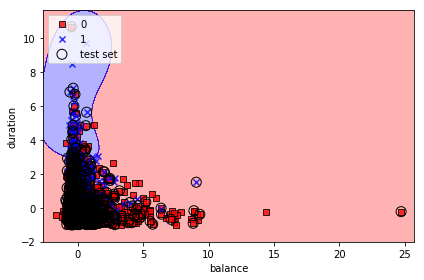

2-feature Training accuracy: 0.889696586599
2-feature Test accuracy: 0.883566691231
3-feature Training accuracy: 0.896965865992
3-feature Test accuracy: 0.895357406043


In [33]:
svm.fit(X1_train_std[:, k12_svm], y1_train)

X1_combined_std= np.vstack((X1_train_std[:, k12_svm], X1_test_std[:, k12_svm]))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(X1_combined_std, y1_combined, 
                      classifier=svm, 
                      test_idx=range(3164, 4521))

plt.xlabel('balance')
plt.ylabel('duration')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', svm.score(X1_train_std[:, k12_svm], y1_train))
print('2-feature Test accuracy:', svm.score(X1_test_std[:, k12_svm], y1_test))

svm.fit(X1_train_std[:, k13_svm], y1_train)
print('3-feature Training accuracy:', svm.score(X1_train_std[:, k13_svm], y1_train))
print('3-feature Test accuracy:', svm.score(X1_test_std[:, k13_svm], y1_test))

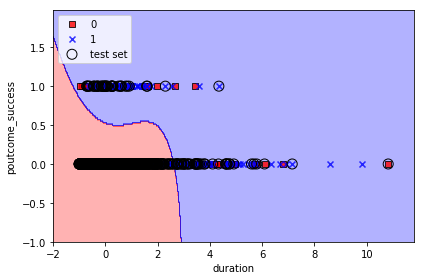

2-feature Training accuracy: 0.895701643489
2-feature Test accuracy: 0.899042004422
3-feature Training accuracy: 0.899494310999
3-feature Test accuracy: 0.900515843773


In [34]:
svm.fit(X2_train_std[:, k22_svm], y2_train)

X2_combined_std= np.vstack((X2_train_std[:, k22_svm], X2_test_std[:, k22_svm]))
y2_combined = np.hstack((y2_train, y2_test))
plot_decision_regions(X2_combined_std, y2_combined, 
                      classifier=svm, 
                      test_idx=range(3164, 4521))

plt.xlabel('duration')
plt.ylabel('poutcome_success')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', svm.score(X2_train_std[:, k22_svm], y2_train))
print('2-feature Test accuracy:', svm.score(X2_test_std[:, k22_svm], y2_test))

svm.fit(X2_train_std[:, k23_svm], y2_train)
print('3-feature Training accuracy:', svm.score(X2_train_std[:, k23_svm], y2_train))
print('3-feature Test accuracy:', svm.score(X2_test_std[:, k23_svm], y2_test))

<a id='Logistic Regression'></a>
# Logistic Regression

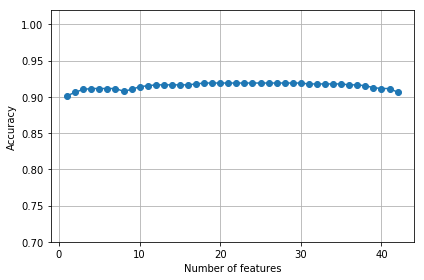

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
# selecting features from dataset bank_dummy
sbs = SBS(lr, k_features=1)
sbs.fit(X1_train_std, y1_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [36]:
k12_lr = list(sbs.subsets_[-2])
k13_lr = list(sbs.subsets_[-3])
print(bank_dummy.columns[k12_lr])
print(bank_dummy.columns[k13_lr])

Index(['duration', 'poutcome_success'], dtype='object')
Index(['duration', 'month_oct', 'poutcome_success'], dtype='object')


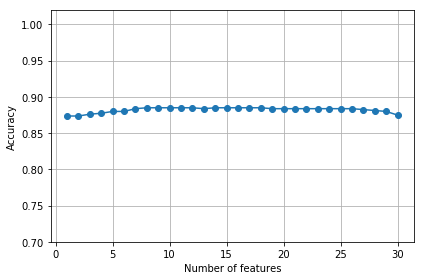

In [37]:
# selecting features from dataset bank_ordinal_dummy
sbs = SBS(lr, k_features=1)
sbs.fit(X2_train_std, y2_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [38]:
k22_lr = list(sbs.subsets_[-2])
k23_lr = list(sbs.subsets_[-3])
print(bank_dummy.columns[k22_lr])
print(bank_dummy.columns[k23_lr])

Index(['job_housemaid', 'month_aug'], dtype='object')
Index(['pdays', 'job_housemaid', 'month_aug'], dtype='object')


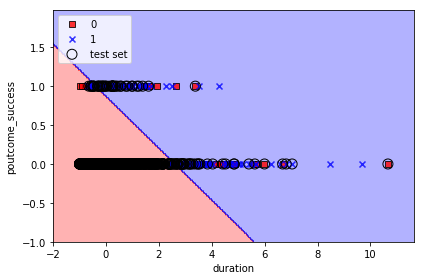

2-feature Training accuracy: 0.899810366625
2-feature Test accuracy: 0.898305084746
3-feature Training accuracy: 0.901390644753
3-feature Test accuracy: 0.896831245394


In [39]:
lr.fit(X1_train_std[:, k12_lr], y1_train)

X1_combined_std= np.vstack((X1_train_std[:, k12_lr], X1_test_std[:, k12_lr]))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(X1_combined_std, y1_combined, 
                      classifier=lr, 
                      test_idx=range(3164, 4521))

plt.xlabel('duration')
plt.ylabel('poutcome_success')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', lr.score(X1_train_std[:, k12_lr], y1_train))
print('2-feature Test accuracy:', lr.score(X1_test_std[:, k12_lr], y1_test))

lr.fit(X1_train_std[:, k13_lr], y1_train)
print('3-feature Training accuracy:', lr.score(X1_train_std[:, k13_lr], y1_train))
print('3-feature Test accuracy:', lr.score(X1_test_std[:, k13_lr], y1_test))

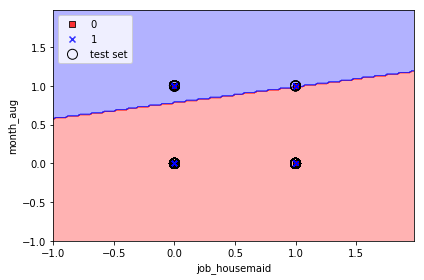

2-feature Training accuracy: 0.89190897598
2-feature Test accuracy: 0.895357406043
3-feature Training accuracy: 0.899810366625
3-feature Test accuracy: 0.899778924097


In [41]:
lr.fit(X2_train_std[:, k22_lr], y2_train)

X2_combined_std= np.vstack((X2_train_std[:, k22_lr], X2_test_std[:, k22_lr]))
y2_combined = np.hstack((y2_train, y2_test))
plot_decision_regions(X2_combined_std, y2_combined, 
                      classifier=lr, 
                      test_idx=range(3164, 4521))

plt.xlabel('job_housemaid')
plt.ylabel('month_aug')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

print('2-feature Training accuracy:', lr.score(X2_train_std[:, k22_lr], y2_train))
print('2-feature Test accuracy:', lr.score(X2_test_std[:, k22_lr], y2_test))

lr.fit(X2_train_std[:, k23_lr], y2_train)
print('3-feature Training accuracy:', lr.score(X2_train_std[:, k23_lr], y2_train))
print('3-feature Test accuracy:', lr.score(X2_test_std[:, k23_lr], y2_test))